In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

!pip install chart_studio
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

!pip install inflection
import inflection

import datetime
from datetime import datetime
import calendar
from scipy import stats as stats
import xgboost as xgb

import statsmodels as sm
from scipy import stats

import math
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, IncrementalPCA

!pip install gdown # Install gdown to download from Google Drive
import gdown


In [7]:
# Update the URL to download the raw CSV data using gdown
url = 'https://drive.google.com/uc?id=1IxKh8NYOpUr7zFsLeRgbAWRpuiYlyS1J'
output = 'loan.csv'  # Define the output filename
gdown.download(url, output, quiet=False) #Download the file

loan = pd.read_csv('loan.csv')  # Now read the downloaded CSV file
loan.head()

Downloading...
From: https://drive.google.com/uc?id=1IxKh8NYOpUr7zFsLeRgbAWRpuiYlyS1J
To: /content/loan.csv
100%|██████████| 32.0M/32.0M [00:00<00:00, 53.1MB/s]


,disbursement_channel,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,business_line,loan_amount,loan_purpose,liquidity
0,1.0,0,3.75,2023-09-01 00:00:00.000000000,571094,3.0,Unknown,0.0,36.0,2.0,Unknown,3450000.0,ACCOMODATION,AVERAGE
1,2.0,1,3.75,2023-09-01 00:00:00.000000000,569518,4.0,YES,1.0,25.0,2.6,0.0,3060000.0,SHOPPING,AVERAGE
2,1.0,0,3.75,2023-09-01 00:00:00.000000000,569723,0.0,Unknown,0.0,25.0,1.7,0.0,1520000.0,SHOPPING,POOR
3,1.0,1,3.75,2023-09-01 00:00:00.000000000,569501,0.0,YES,1.0,15.0,2.0,0.0,0.0,SHOPPING,GOOD
4,1.0,0,3.75,2023-09-01 00:00:00.000000000,569818,0.0,YES,2.0,25.0,2.0,0.0,2910000.0,VEHICLE,POOR


In [9]:
# Update the URL to download the raw CSV data using gdown
url = 'https://drive.google.com/uc?id=17nddvAh5mwY99Ush-N1a6VSTAPubfge1' # Updated URL
output = 'demo.csv'  # Define the output filename
gdown.download(url, output, quiet=False) #Download the file

demo = pd.read_csv('demo.csv')  # Now read the downloaded CSV file
demo.head()

Downloading...
From: https://drive.google.com/uc?id=17nddvAh5mwY99Ush-N1a6VSTAPubfge1
To: /content/demo.csv
100%|██████████| 16.8M/16.8M [00:00<00:00, 142MB/s]


,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,contract_no,weight,education,customer_income,creditibility,accommodation_type,height,working_in_year,marital_status,income_resource,age
0,4,0,52,18,2,79,30,61,1,18808000,5,0,157,20,2,5,55
1,2,1,83,18,9,83,68,74,1,17533000,2,0,164,0,2,5,35
2,4,0,75,2,9,75,83,69,1,17533000,0,1,159,0,0,5,21
3,4,0,87,2,6,79,161,94,1,18808000,0,0,178,10,3,1,54
4,4,0,1,18,9,33,183,87,1,3256000,5,0,168,7,1,5,51


In [10]:
# Merge the two datasets on the 'contract_no' column
data = pd.merge(loan, demo, on = 'contract_no', how = 'inner')
data.head()

,disbursement_channel,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,...,weight,education,customer_income,creditibility,accommodation_type,height,working_in_year,marital_status,income_resource,age
0,2.0,1,3.75,2023-09-01 00:00:00.000000000,569518,4.0,YES,1.0,25.0,2.6,...,74,2,19092000,0,0,178,2,1,1,55
1,1.0,0,3.75,2023-09-01 00:00:00.000000000,569723,0.0,Unknown,0.0,25.0,1.7,...,65,1,1936000,2,3,189,16,4,5,60
2,1.0,0,3.75,2023-09-01 00:00:00.000000000,569818,0.0,YES,2.0,25.0,2.0,...,85,1,17533000,1,0,161,2,2,1,34
3,1.0,0,3.75,2023-09-01 00:00:00.000000000,810070,5.0,Unknown,Unknown,12.0,2.0,...,69,1,7025000,3,0,159,5,2,5,33
4,1.0,1,3.75,2023-09-01 00:00:00.000000000,858618,5.0,YES,3.0,15.0,3.1,...,78,1,18959000,1,0,183,4,2,5,29


In [11]:
data['disbursement_date'] = pd.to_datetime(data['disbursement_date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229341 entries, 0 to 229340
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   disbursement_channel        229341 non-null  object        
 1   insurance_company           229341 non-null  int64         
 2   insurance_rate              229341 non-null  float64       
 3   disbursement_date           229341 non-null  datetime64[ns]
 4   contract_no                 229341 non-null  int64         
 5   rate                        229341 non-null  float64       
 6   has_insurance               229341 non-null  object        
 7   product_category            229341 non-null  object        
 8   loan_term                   229341 non-null  float64       
 9   month_interest              229341 non-null  float64       
 10  business_line               229341 non-null  object        
 11  loan_amount                 229341 non-

In [13]:
data.head()

,disbursement_channel,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,...,weight,education,customer_income,creditibility,accommodation_type,height,working_in_year,marital_status,income_resource,age
0,2.0,1,3.75,2023-09-01,569518,4.0,YES,1.0,25.0,2.6,...,74,2,19092000,0,0,178,2,1,1,55
1,1.0,0,3.75,2023-09-01,569723,0.0,Unknown,0.0,25.0,1.7,...,65,1,1936000,2,3,189,16,4,5,60
2,1.0,0,3.75,2023-09-01,569818,0.0,YES,2.0,25.0,2.0,...,85,1,17533000,1,0,161,2,2,1,34
3,1.0,0,3.75,2023-09-01,810070,5.0,Unknown,Unknown,12.0,2.0,...,69,1,7025000,3,0,159,5,2,5,33
4,1.0,1,3.75,2023-09-01,858618,5.0,YES,3.0,15.0,3.1,...,78,1,18959000,1,0,183,4,2,5,29


In [14]:

# Dropping unnecessary columns
data = data.drop(columns = ['contract_no', 'disbursement_date'])

# Identify categorical and numerical features
categorical_features = data.select_dtypes(include = ['object']).columns.tolist()
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),  # handle missing values by filling with the mean
    ('scaler', StandardScaler())  # standardize numerical features
])

categorical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),  # fill missing with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))  # one-hot encode categorical features
])

# Combine the pipelines into a single transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Apply the transformation to the dataset
processed_data = preprocessor.fit_transform(data)

# Convert the processed data into a DataFrame to analyze feature count and readiness for clustering
processed_df = pd.DataFrame(processed_data.toarray() if isinstance(processed_data, pd.DataFrame) else processed_data)

# Display the transformed data sample and shape for further analysis
processed_df.head(), processed_df.shape


(         0         1         2         3         4         5         6   \
 0  0.851365  1.145893  1.032906  0.013839  1.019675  0.519212  0.267750   
 1 -1.174584  1.145893 -1.174134  0.013839 -0.543025 -0.370097  0.267750   
 2 -1.174584  1.145893 -1.174134  0.013839 -0.022125  0.432591 -3.709582   
 3 -1.174584  1.145893  1.584666 -1.585397 -0.022125 -1.247857  0.267750   
 4  0.851365  1.145893  1.584666 -1.216343  1.887842 -0.953345  0.267750   
 
          7         8         9   ...   59   60   61   62   63   64   65   66  \
 0 -0.656763  0.169870  0.517698  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
 1 -0.656763 -0.226420 -2.188788  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2  0.462759  1.843094  0.517698  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
 3  1.582281  1.534869  0.517698  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
 4 -0.656763 -2.339967  0.517698  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
 
     67   68  
 0  0.0  0.0  
 1  1.0  0.0  
 2  1.0  

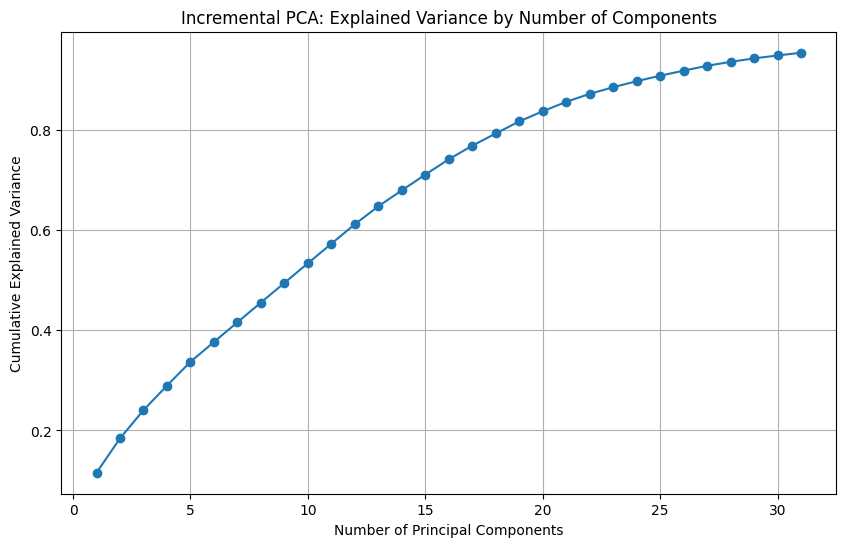

Shape of data after applying Incremental PCA: (229341, 31)


In [15]:

# Use a subset of data to determine the optimal number of components for 95% variance
pca = PCA(n_components = 0.95)
pca.fit(processed_df.sample(10000, random_state = 42))

# Get the number of components needed for 95% variance
optimal_components = pca.n_components_

# Apply IncrementalPCA with the identified number of components
incremental_pca = IncrementalPCA(n_components = optimal_components, batch_size = 5000)
pca_data = incremental_pca.fit_transform(processed_df)

# Plot the cumulative explained variance ratio for verification
explained_variance_ratio = incremental_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker = 'o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Incremental PCA: Explained Variance by Number of Components')
plt.grid()
plt.show()

# Display the reduced data shape after PCA for verification
print("Shape of data after applying Incremental PCA:", pca_data.shape)


In [16]:

# Separate numerical and categorical features
categorical_features = data.select_dtypes(include = ['object']).columns.tolist()

# Encode categorical features using OneHotEncoding
encoder = OneHotEncoder(sparse_output = False, drop = 'first')  # Updated parameter
encoded_categorical = encoder.fit_transform(data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns = encoder.get_feature_names_out(categorical_features))

# Concatenate numerical and encoded categorical features
# data_combined = encoded_categorical_df
# pd.DataFrame(data[numerical_features], columns = numerical_features).join(encoded_categorical_df)

# Standardize the combined data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(encoded_categorical_df), columns = encoded_categorical_df.columns)

# Function to select significant features with contributions > 30% for specified sets of principal components
def select_significant_features(data_scaled, n_components_list, threshold = 0.3):
    all_significant_features = {}

    for n_components in n_components_list:
        pca = PCA(n_components=n_components)
        pca.fit(data_scaled)

        # Get the feature loadings for each principal component
        loadings = pd.DataFrame(pca.components_.T, columns = [f'PC{i+1}' for i in range(n_components)], index = data_scaled.columns)

        # Select features with contributions > threshold
        significant_features = pd.DataFrame()
        for i in range(1, n_components+1):
            pc_column = f'PC{i}'
            significant = loadings[pc_column].abs() > threshold
            selected_features = loadings[significant][[pc_column]]
            selected_features['Feature'] = selected_features.index
            selected_features['Contribution'] = selected_features[pc_column].abs()
            selected_features = selected_features.sort_values(by = 'Contribution', ascending=False)
            significant_features = pd.concat([significant_features, selected_features])

        # Store the results in a dictionary with the key as the number of principal components
        all_significant_features[f'PC1-PC{n_components}'] = significant_features.drop_duplicates(subset = ['Feature'])

    return all_significant_features

# Call the function to get features with contributions > 30% for (PC1-PC3), (PC1-PC5), (PC1-PC10)
n_components_list = [3, 5, 10]
significant_features_dict = select_significant_features(data_scaled, n_components_list)

# Print the features with contributions > 30% for each set of principal components
for key, significant_features in significant_features_dict.items():
    print(f"\nSignificant features for {key}:")
    print(significant_features[['Feature', 'Contribution']])



Significant features for PC1-PC3:
                                                 Feature  Contribution
business_line_1.0                      business_line_1.0      0.542410
disbursement_channel_4.0        disbursement_channel_4.0      0.516736
product_category_12.0              product_category_12.0      0.413220
product_category_14.0              product_category_14.0      0.309813
has_insurance_YES                      has_insurance_YES      0.702648
has_insurance_Unknown              has_insurance_Unknown      0.702551
disbursement_channel_1.0        disbursement_channel_1.0      0.644844
disbursement_channel_2.0        disbursement_channel_2.0      0.507229
product_category_1.0                product_category_1.0      0.322612
disbursement_channel_Others  disbursement_channel_Others      0.309399

Significant features for PC1-PC5:
                                                 Feature  Contribution
business_line_1.0                      business_line_1.0      0.542410
disburs

In [17]:

# Select numerical features
numerical_features = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()

# Use only the numerical features
data_numerical = data[numerical_features]

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_numerical), columns = numerical_features)

# Function to select significant features with contributions > 30% for specified sets of principal components
def select_significant_features(data_scaled, n_components_list, threshold = 0.3):
    all_significant_features = {}

    for n_components in n_components_list:
        pca = PCA(n_components=n_components)
        pca.fit(data_scaled)

        # Get the feature loadings for each principal component
        loadings = pd.DataFrame(pca.components_.T, columns = [f'PC{i+1}' for i in range(n_components)], index = data_scaled.columns)

        # Select features with contributions > threshold
        significant_features = pd.DataFrame()
        for i in range(1, n_components+1):
            pc_column = f'PC{i}'
            significant = loadings[pc_column].abs() > threshold
            selected_features = loadings[significant][[pc_column]]
            selected_features['Feature'] = selected_features.index
            selected_features['Contribution'] = selected_features[pc_column].abs()
            selected_features = selected_features.sort_values(by = 'Contribution', ascending = False)
            significant_features = pd.concat([significant_features, selected_features])

        # Store the results in a dictionary with the key as the number of principal components
        all_significant_features[f'PC1-PC{n_components}'] = significant_features.drop_duplicates(subset = ['Feature'])

    return all_significant_features

# Call the function to get features with contributions > 30% for (PC1-PC3), (PC1-PC5), (PC1-PC10)
n_components_list = [3, 5, 10]
significant_features_dict = select_significant_features(data_scaled, n_components_list)

# Print the features with contributions > 30% for each set of principal components
for key, significant_features in significant_features_dict.items():
    print(f"\nSignificant features for {key}:")
    print(significant_features[['Feature', 'Contribution']])



Significant features for PC1-PC3:
                                               Feature  Contribution
age                                                age      0.393540
marital_status                          marital_status      0.341013
working_in_year                        working_in_year      0.340228
customer_income                        customer_income      0.337373
income_resource                        income_resource      0.331266
permanent_address_province  permanent_address_province      0.649788
company_address_province      company_address_province      0.635344
loan_term                                    loan_term      0.534102
loan_amount                                loan_amount      0.512097

Significant features for PC1-PC5:
                                               Feature  Contribution
age                                                age      0.393540
marital_status                          marital_status      0.341013
working_in_year                  

In [18]:
dimension = ['age', 'marital_status', 'working_in_year', 'customer_income', 'income_resource',
             'loan_term', 'loan_amount', 'job', 'month_interest', 'insurance_rate', 'creditibility',
             'education', 'industry', 'business_line_1.0', 'disbursement_channel_4.0', 'has_insurance_YES',
             'disbursement_channel_1.0', 'disbursement_channel_2.0', 'product_category_3.0']

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

data = pd.DataFrame(data[numerical_features], columns = numerical_features).join(encoded_categorical_df)
data_model = data[dimension]

# Function to apply clustering and compute metrics
def evaluate_clustering(X, clustering_algo):
    clustering_algo.fit(X)
    labels = clustering_algo.labels_
    if len(set(labels)) == 1:
        return None, None, None  # Return None if there is only one cluster
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Evaluate KMeans
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans_metrics = evaluate_clustering(data_model, kmeans)

# Evaluate Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_metrics = evaluate_clustering(data_model, hierarchical)

# Evaluate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_model)
labels_dbscan = dbscan.labels_

# Calculate DBSCAN metrics only if there are at least 2 clusters
if len(set(labels_dbscan)) > 1:
    dbscan_metrics = (
        silhouette_score(data_model, labels_dbscan),
        davies_bouldin_score(data_model, labels_dbscan),
        calinski_harabasz_score(data_model, labels_dbscan)
    )
else:
    dbscan_metrics = ('Not applicable (only one cluster found)', ) * 3


# Prepare results
results = {
    'Clustering Method': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_metrics[0], hierarchical_metrics[0], dbscan_metrics[0]],
    'Davies-Bouldin Index': [kmeans_metrics[1], hierarchical_metrics[1], dbscan_metrics[1]],
    'Calinski-Harabasz Index': [kmeans_metrics[2], hierarchical_metrics[2], dbscan_metrics[2]],
}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Clustering Methods Comparison", dataframe=results_df)

results_df

NameError: name 'data' is not defined